워드 임베딩(Word Embedding)은 단어를 벡터로 표현하는 것을 말합니다. 워드 임베딩은 단어를 밀집 표현으로 변환하는 방법을 말합니다. 이번 챕터에서는 희소 표현, 밀집 표현, 그리고 워드 임베딩에 대한 개념을 이해합니다.

### 1. 희소 표현(Sparse Representation)
앞서 원-핫 인코딩을 통해서 나온 원-핫 벡터들은 표현하고자 하는 단어의 인덱스의 값만 1이고, 나머지 인덱스에는 전부 0으로 표현되는 벡터 표현 방법이었습니다. 이렇게 벡터 또는 행렬(matrix)의 값이 대부분이 0으로 표현되는 방법을 희소 표현(sparse representation)이라고 합니다. 그러니까 원-핫 벡터는 희소 벡터(sparse vector)입니다.

이러한 희소 벡터의 문제점은 단어의 개수가 늘어나면 벡터의 차원이 한없이 커진다는 점입니다. 원-핫 벡터로 표현할 때는 갖고 있는 코퍼스에 단어가 10,000개였다면 벡터의 차원은 10,000이어야만 했습니다. 심지어 그 중에서 단어의 인덱스에 해당되는 부분만 1이고 나머지는 0의 값을 가져야만 했습니다. 단어 집합이 클수록 고차원의 벡터가 됩니다. 예를 들어 단어가 10,000개 있고 강아지란 단어의 인덱스는 5였다면 원 핫 벡터는 이렇게 표현되어야 했습니다.

Ex) 강아지 = [ 0 0 0 0 0 1 0 0 0 0 0 0 ... 중략 ... 0] # 이 때 1 뒤의 0의 수는 9994개.

이러한 벡터 표현은 공간적 낭비를 불러일으킵니다. 원-핫 벡터의 문제점은 단어 벡터 간 유사도를 표현할 수 없다는 점도 있습니다. 예를 들어보겠습니다. dog, cat, computer, netbook, book 이러한 단어가 5개에 대해서 원-핫 인코딩을 한다고 해봅시다. 우선 이 단어들에 0, 1, 2, 3, 4라는 고유한 정수를 부여합다. 그리고 나서 단어의 개수가 5개이므로 벡터의 차원으로 5로하고 부여된 각 고유한 정수를 인덱스로 하여 해당 인덱스에는 1, 나머지는 0의 값을 채워넣습니다. 이를 코드로 표현하면 아래와 같습니다.

In [1]:
import torch
# 원-핫 벡터 생성
dog = torch.FloatTensor([1, 0, 0, 0, 0])
cat = torch.FloatTensor([0, 1, 0, 0, 0])
computer = torch.FloatTensor([0, 0, 1, 0, 0])
netbook = torch.FloatTensor([0, 0, 0, 1, 0])
book = torch.FloatTensor([0, 0, 0, 0, 1])

In [2]:
# 이러한 원-핫 벡터간 코사인 유사도를 구해보겠습니다.
print(torch.cosine_similarity(dog, cat, dim=0))
print(torch.cosine_similarity(cat, computer, dim=0))
print(torch.cosine_similarity(computer, netbook, dim=0))
print(torch.cosine_similarity(netbook, book, dim=0))

tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)


사람이 생각하기에 강아지와 고양이라는 단어의 유사도는 고양이와 컴퓨터라는 단어의 유사도보다 높을 것이며, 컴퓨터와 넷북이라는 단어의 유사도는 넷북과 책이라는 단어의 유사도보다 높을 것 같지만 어떤 단어들을 선택해서 코사인 유사도를 구해도 유사도는 전부 동일합니다. 단어 간 의미적 유사도를 반영할 수 없다는 것은 자연어 처리에서 치명적입니다.

### 2. 밀집 표현(Dense Representation)
이러한 희소 표현과 반대되는 표현이 있으니, 이를 밀집 표현(dense representation)이라고 합니다. 밀집 표현은 벡터의 차원을 단어 집합의 크기로 상정하지 않습니다. 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춥니다. 또한, 이 과정에서 더 이상 0과 1만 가진 값이 아니라 실수값을 가지게 됩니다. 다시 희소 표현의 예를 가져와봅시다.

Ex) 강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0] # 이 때 1 뒤의 0의 수는 9995개. 차원은 10,000

예를 들어 10,000개의 단어가 있을 때 강아지란 단어를 표현하기 위해서는 위와 같은 표현을 사용했습니다. 하지만 밀집 표현을 사용하고, 사용자가 밀집 표현의 차원을 128로 설정한다면, 모든 단어의 벡터 표현의 차원은 128로 바뀌면서 모든 값이 실수가 됩니다.

Ex) 강아지 = [0.2 1.8 1.1 -2.1 1.1 2.8 ... 중략 ...] # 이 벡터의 차원은 128

이 경우 벡터의 차원이 조밀해졌다고 하여 밀집 벡터(dense vector)라고 합니다.

### 3. 워드 임베딩(Word Embedding)
단어를 밀집 벡터(dense vector)의 형태로 표현하는 방법을 워드 임베딩(word embedding)이라고 합니다. 그리고 이 밀집 벡터를 워드 임베딩 과정을 통해 나온 결과라고 하여 임베딩 벡터(embedding vector)라고도 합니다.

워드 임베딩 방법론으로는 LSA, Word2Vec, FastText, Glove 등이 있습니다. 파이토치에서 제공하는 도구인 nn.embedding()는 앞서 언급한 방법들을 사용하지는 않지만, 단어를 랜덤한 값을 가지는 밀집 벡터로 변환한 뒤에, 인공 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터를 학습하는 방법을 사용합니다. 아래의 표는 앞서 배운 원-핫 벡터와 지금 배우고 있는 임베딩 벡터의 차이를 보여줍니다.

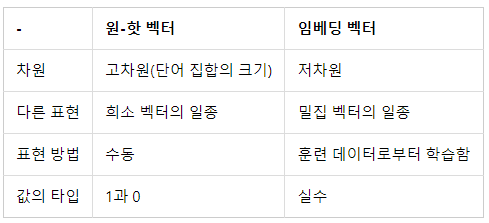